In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Problemas 1D

## Diferencias finitas

**Ejercicio 4**

Resolver utilizando el metodo de diferencias finitas el problema:

   $-u''(x)=20x^3 - 12x^2, \  x \in (0,1)$
   
   $u(0)=0, \   u(1)=0$

para los distintos valores de h=1/4, 1/8,...,1/1024 calcular el error obtenido en norma
L2(0,1) utilizando el metodo de los trapecios para aproximar la integral y dibujar una
grafica del error.
    Nota: error(h)=||u-uh|| norma L2.


In [2]:
def trapecio(f,h):
    return h*(f[0] + 2*sum(f[1:-1]) + f[-1])/2

In [3]:
def exacta(x):
    return -x**5+x**4

In [7]:
def diffinitas(a, b, h, fun, ua, ub):
    N = int((b-a)/h)
    mesh = np.linspace(a,b,N+1)
    f = fun(mesh[1:-1])
    f[0] = f[0] + ua/h**2
    f[-1] = f[-1] + ub/h**2
    A = -np.eye(N-1, k=-1) - np.eye(N-1, k=1) + 2*np.eye(N-1)
    A = A/h**2
    u = np.append(np.insert(np.dot(np.linalg.inv(A),f),0,ua),ub)
    #plt.plot(mesh, u)
    error = np.sqrt(trapecio((u-exacta(mesh))**2,h))
    return error

In [5]:
def fun(x):
    return 20*x**3-12*x**2

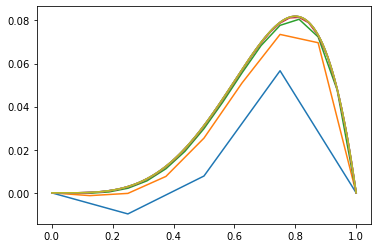

In [6]:
for i in np.arange(1,10,1):
    h = 1/2**(i+1)
    diffinitas(0, 1, h, fun, 0, 0)
plt.show()

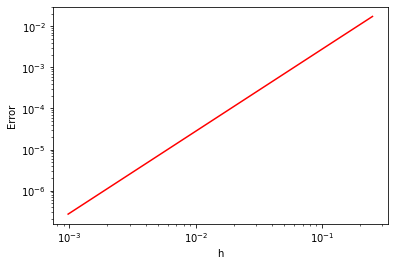

In [8]:
e1=[]
hs=[]
for i in np.arange(1,10,1):
    h = 1/2**(i+1)
    e1.append(diffinitas(0, 1, h, fun, 0, 0))
    hs.append(h)
plt.plot(hs,e1, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.show()

**Ejercicio 5**

Resolver el problema:

   $u-u''(x) = (1+\pi^2)cos(\pi x),\     x \in (-1,1/2)$
   
   $u(-1) =-1, \ u(1/2)=0$
   
Nota: la solucion exacta es u(x)=cos($\pi$x)


In [9]:
def exacta(x):
    return np.cos(math.pi*x)
    

In [13]:
def diffinitas(a, b, h, fun, ua, ub):
    N = int((b-a)/h)
    mesh = np.linspace(a,b,N+1)
    f = fun(mesh[1:-1])
    f[0] = f[0] + ua/h**2
    f[-1] = f[-1] + ub/h**2
    A = -np.eye(N-1, k=-1) - np.eye(N-1, k=1) + (2+h**2)*np.eye(N-1)
    A = A/h**2
    u = np.append(np.insert(np.dot(np.linalg.inv(A),f),0,ua),ub)
    #plt.plot(mesh, u)
    error = np.sqrt(trapecio((u-exacta(mesh))**2,h))
    return error

In [11]:
def fun(x):
    return (1+math.pi**2)*np.cos(math.pi*x)

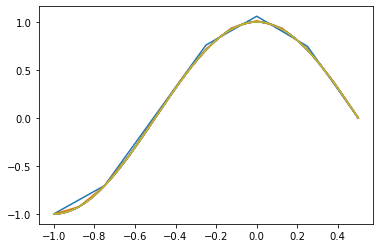

In [12]:
for i in np.arange(1,10,1):
    h = 1/2**(i+1)
    diffinitas(-1, .5, h, fun, -1, 0)
plt.show()

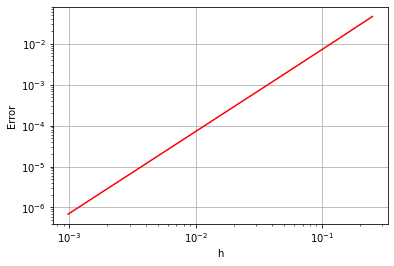

In [14]:
e1=[]
hs=[]
for i in np.arange(1,10,1):
    h = 1/2**(i+1)
    e1.append(diffinitas(-1, .5, h, fun, -1, 0))
    hs.append(h)
plt.plot(hs,e1, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.grid(True)
plt.show()

**Ejercicio 6**

Resolver el problema:

   $u- \nu u''(x)=1,\    x\in (0,1)$
   
   $u(0)=0,\ u(1)=0$
    
para $\nu$ = 1, 10<sup>-1</sup>,...,10<sup>-7</sup>

In [15]:
def diffinitas(a, b, h, nu, fun, ua, ub):
    N = int((b-a)/h)
    mesh = np.linspace(a,b,N+1)
    f = np.ones(len(mesh[1:-1]))
    f = f*(h**2)/nu
    f[0] = f[0] + ua
    f[-1] = f[-1] + ub
    A = -np.eye(N-1, k=-1) - np.eye(N-1, k=1) + (2+(h**2)/nu)*np.eye(N-1)
    u = np.append(np.insert(np.dot(np.linalg.inv(A),f),0,ua),ub)
    plt.plot(mesh, u)

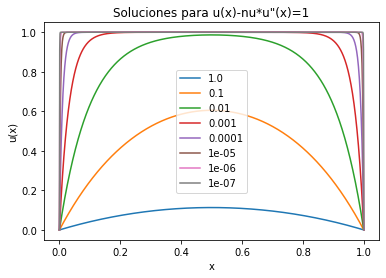

In [16]:
h = 1/1024
nus=[]
for i in np.arange(0,8,1):
    nu = 1/10**i
    nus.append(nu)
    diffinitas(0, 1, h, nu, fun, 0, 0)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Soluciones para u(x)-nu*u"(x)=1')
plt.legend(nus,loc='best')
plt.show()

**Ejercicio 7**

Resolver el problema:

   $u- \nu u"(x)=1, \   x\in (0,1)$
   
   $u(0)=0,\  u'(1)=-1$
    
para $\nu$ = 1, 10<sup>-1</sup>,...,10<sup>-7</sup>

In [17]:
def diffinitas(a, b, h, nu, fun, ua):
    N = int((b-a)/h)
    mesh = np.linspace(a,b,N+1)
    f = np.ones(len(mesh[1:]))
    f = f*(h**2)/nu
    f[0] = f[0] + ua
    f[-1] = f[-1] - 2*h
    A = -np.eye(N, k=-1) - np.eye(N, k=1) + (2+(h**2)/nu)*np.eye(N)
    A[N-1, N-2] = -2
    u = np.insert(np.dot(np.linalg.inv(A),f),0,ua)
    plt.plot(mesh, u)

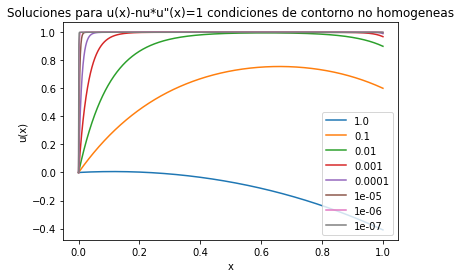

In [18]:
h = 1/1024
nus=[]
for i in np.arange(0,8,1):
    nu = 1/10**i
    nus.append(nu)
    diffinitas(0, 1, h, nu, fun, 0)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Soluciones para u(x)-nu*u"(x)=1 condiciones de contorno no homogeneas')
plt.legend(nus,loc='best')
plt.show()

## Elementos finitos

**Ejercicio 4**

In [19]:
def fun(x):
    return 20*x**3-12*x**2

In [20]:
def exacta(x):
    return -x**5+x**4

In [23]:
def elemfin(a, b, h, fun, ua, ub):
    N = int((b-a)/h)
    mesh = np.linspace(a,b,N+1)
    f = fun(mesh)
    M = h*(1/6*np.eye(N+1,k=-1) + 2/3*np.eye(N+1) + 1/6*np.eye(N+1, k=1))
    b = np.dot(M,f)
    K = (-np.eye(N-1, k=-1) + 2*np.eye(N-1) - np.eye(N-1, k=1))/h
    u = np.append(np.insert(np.dot(np.linalg.inv(K),b[1:-1]),0,ua),ub)
    #plt.plot(mesh, u)
    error = np.sqrt(trapecio((u-exacta(mesh))**2,h))
    return error

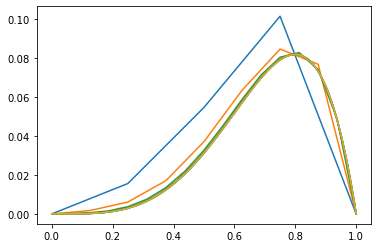

In [22]:
for i in np.arange(1,10,1):
    h = 1/2**(i+1)
    elemfin(0, 1, h, fun, 0, 0)
plt.show()

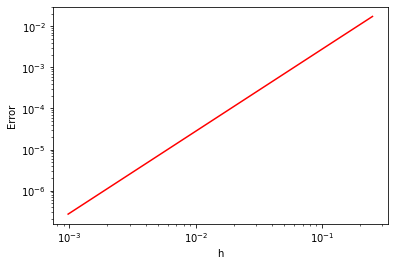

In [24]:
errors=[]
steps=[]
for i in np.arange(1,10,1):
    h = 1/2**(i+1)
    errors.append(elemfin(0, 1, h, fun, 0, 0))
    steps.append(h)
plt.plot(steps, errors, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.show()

**Ejercicio 5**

In [25]:
def fun(x):
    return (1+math.pi**2)*np.cos(math.pi*x)-2/3*x+1/3

In [26]:
def exacta(x):
    return np.cos(math.pi*x)

In [27]:
def elemfin(a, b, h, fun, ua, ub):
    N = int((b-a)/h)
    mesh = np.linspace(a,b,N+1)
    f = fun(mesh)
    M = h*(1/6*np.eye(N+1,k=-1) + 2/3*np.eye(N+1) + 1/6*np.eye(N+1, k=1))
    b = np.dot(M,f)
    K = (-np.eye(N-1, k=-1) + 2*np.eye(N-1) - np.eye(N-1, k=1))/h
    w = np.dot(np.linalg.inv(M[1:N, 1:N]+K),b[1:-1])
    v = -2/3*mesh[1:-1]+1/3
    uh = w-v
    return uh

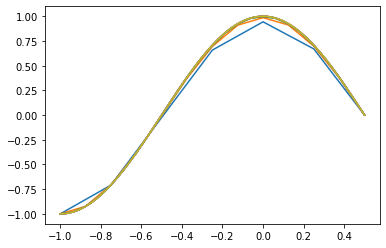

In [28]:
for i in np.arange(1,10,1):
    h = 1/2**(i+1)
    N = int((1/2+1)/h)
    mesh = np.linspace(-1, 1/2,N+1)
    uh = elemfin(-1, 1/2, h, fun, 0, 0)
    u = np.append(np.insert(uh,0,-1),0)
    plt.plot(mesh, u)
plt.show()

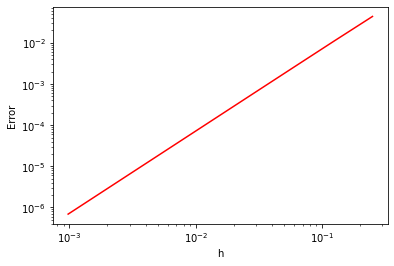

In [29]:
errors=[]
steps=[]
for i in np.arange(1,10,1):
    h = 1/2**(i+1)
    N = int((1/2+1)/h)
    mesh = np.linspace(-1, 1/2,N+1)
    uh = elemfin(-1, 1/2, h, fun, 0, 0)
    u = np.append(np.insert(uh,0,-1),0)
    errors.append(np.sqrt(trapecio((u-exacta(mesh))**2,h)))
    steps.append(h)
plt.plot(steps, errors, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.show()

**Ejercicio 6**

In [30]:
def elemfin(a, b, h, fun, nu, ua, ub):
    N = int((b-a)/h)
    mesh = np.linspace(a,b,N+1)
    f = np.ones(len(mesh))
    M = h*(1/6*np.eye(N+1,k=-1) + 2/3*np.eye(N+1) + 1/6*np.eye(N+1, k=1))
    b = np.dot(M,f)
    K = (-np.eye(N-1, k=-1) + 2*np.eye(N-1) - np.eye(N-1, k=1))/h
    u = np.append(np.insert(np.dot(np.linalg.inv(M[1:N, 1:N]+K*nu),b[1:-1]),0,ua),ub)
    plt.plot(mesh, u)

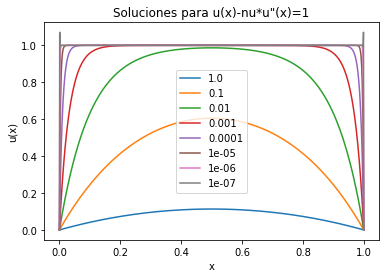

In [31]:
h = 1/1024
nus=[]
for i in np.arange(0,8,1):
    nu = 1/10**i
    nus.append(nu)
    elemfin(0, 1, h, fun, nu, 0, 0)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Soluciones para u(x)-nu*u"(x)=1')
plt.legend(nus,loc='best')
plt.show()

**Ejercicio 7**

Resolver mediante discretización no homogénea el ejercicio 6:

In [32]:
def elemfin(xmesh, nu, ua, ub):
    N = len(xmesh)-1
    f = np.ones(len(xmesh))
    
    hs=[0]*N
    for i in np.arange(1,N+1):
        hs[i-1]=(xmesh[i]-xmesh[i-1])
    
    diag1=[0]*len(xmesh)
    for i in np.arange(1,N-1):
        diag1[i]=(hs[i-1] + hs[i])/3
    
    diag1[0]=hs[0]/3
    diag1[-1]=hs[N-1]/3
    
    
    diag2=[0]*N
    for i in np.arange(0,N):
        diag2[i]=hs[i]/6
    
    M = (np.diag(diag2,k=-1)+np.diag(diag1)+np.diag(diag2,k=1))
    b = np.dot(M,f)
    
    diag3=[0]*(N-1)
    for i in np.arange(0,N-1):
        diag3[i]=(1/hs[i-1]+1/hs[i])
    
    diag4=[0]*(N-2)
    for i in np.arange(1,N-1):
        diag4[i-1]=-1/hs[i]
    
    K = np.diag(diag4,k=-1)+np.diag(diag3)+np.diag(diag4,k=1)
    uh = np.dot(np.linalg.inv(M[1:N,1:N]+K*nu), b[1:-1])
    u = np.append(np.insert(uh,0,ua),ub)
    plt.plot(xmesh, u)


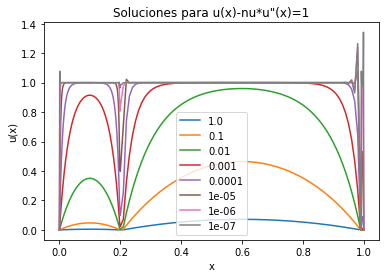

In [33]:
a=0
b=1
x1=np.arange(a,0.199,.001)
x2=np.arange(0.2,b,0.01)
x3=np.arange(b-0.01,b,0.001)
xmesh = np.concatenate((x1, x2, x3))
nus=[]
for i in np.arange(0,8,1):
    nu = 1/10**i
    nus.append(nu)
    elemfin(xmesh, nu, 0, 0)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Soluciones para u(x)-nu*u"(x)=1')
plt.legend(nus,loc='best')
plt.show()

**Ejercicio 8**

Resolver mediante el metodo de elementos finitos el ejercicio 7:

In [34]:
def elemfin(a, b, h, nu, ua, dub):
    N = int((b-a)/h)
    mesh = np.linspace(a,b,N+1)
    f = np.ones(len(mesh))
    f=f/nu
    M = h*(1/6*np.eye(N+1,k=-1) + 2/3*np.eye(N+1) + 1/6*np.eye(N+1, k=1))
    M[N,N]=h/3
    b = np.dot(M,f)
    b[N]=b[N]+dub
    K = (-np.eye(N, k=-1) + 2*np.eye(N) - np.eye(N, k=1))/h
    K[N-1, N-1] = K[N-1, N-1]/2
    uh = np.dot(np.linalg.inv(M[1:, 1:]/nu+K),b[1:])
    u = np.insert(uh,0,ua)
    plt.plot(mesh, u)

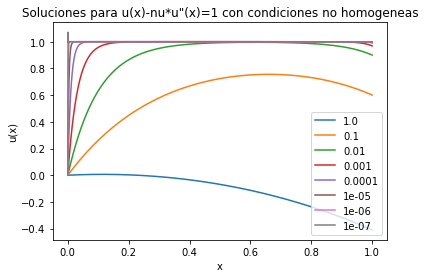

In [35]:
h = 1/1024
dub=-1
nus=[]
for i in np.arange(0,8,1):
    nu = 1/10**i
    nus.append(nu)
    elemfin(0, 1, h, nu, 0, dub)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Soluciones para u(x)-nu*u"(x)=1 con condiciones no homogeneas')
plt.legend(nus,loc='best')
plt.show()